In [38]:
import numpy as np
import pandas as pd
import sklearn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection  import train_test_split ,KFold
from sklearn.cluster import AgglomerativeClustering,KMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.metrics import silhouette_score

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [5]:
df=pd.read_csv("Mall_Customers.csv")

In [6]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.rename(columns={'Genre':'Gender'},inplace=True)

In [13]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
le=LabelEncoder()

In [15]:
df['Gender']=le.fit_transform(df['Gender'])

In [16]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [18]:
x_train,y_test=train_test_split(df,train_size=0.75,test_size=0.25,random_state=True)

In [20]:
x_train.shape

(150, 5)

In [24]:
matrix=linkage(df,method='ward')

Text(0, 0.5, 'Dendogram')

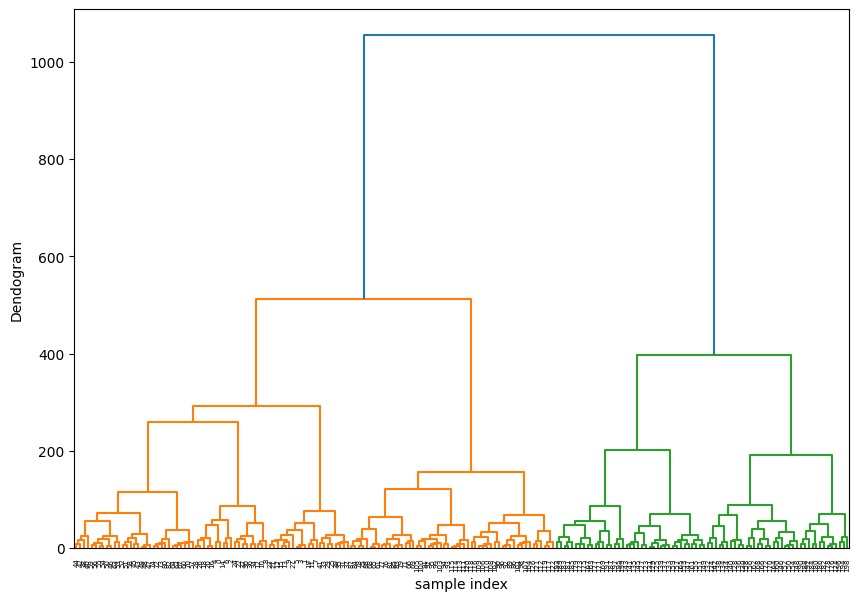

In [29]:
plt.figure(figsize=(10,7))
dendrogram(matrix,orientation='top',distance_sort='descending',show_leaf_counts='True')
plt.xlabel("sample index")
plt.ylabel("Dendogram")

In [43]:
kf=KFold(n_splits=5,shuffle=True,random_state=28)
sh_l=[]
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

for x_ind,y_ind in kf.split(X):
  x_train,x_test=X.iloc[x_ind],X.iloc[y_ind]
  kmeans=KMeans(n_clusters=5,random_state=20)
  kmeans.fit(x_train)
  label=kmeans.predict(x_test)
  score=silhouette_score(x_test,label)
  sh_l.append(score)


In [44]:
sh_l

[np.float64(0.4853438452740185),
 np.float64(0.5628023196318394),
 np.float64(0.4877365812894977),
 np.float64(0.5592391069624225),
 np.float64(0.36703455463778495)]